# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [6]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
data.drop('Unnamed: 0', inplace = True, axis=1)   # 데이터 내부에 의미없는 칼럼 Unnamed: 0이 있어서 제거

In [8]:
data.shape

(6019, 13)

In [9]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


Mileage ~ New_Price까지의 칼럼에 결측치가 존재한다는 것을 알 수 있음

결측치 채워야함

단위를 모두 제거하고 수치형 변수로 바꾸기

In [11]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

In [12]:
data["Name2"] = data["Name"].str.split().str[0]
data.drop('Name', inplace = True, axis=1)

In [14]:
#결측치
data.drop('New_Price', inplace = True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Name2              6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [15]:
data[data['Engine'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name2
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [17]:
data[data['Power'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name2
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,Ford
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30,Hyundai
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,Hyundai
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai
5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda
5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70,Mahindra


In [18]:


data[data['Seats'].isnull()]

#Engine이나 Seats의 경우 해당 값이 null이면 Engine, Seats, Power 값이 null 인 경우가 많다.

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name2
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60,Ford
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70,Honda


In [19]:
data = data.dropna(subset=['Engine'])
data = data.dropna(subset=['Seats'])

In [20]:
#Power의 값은 회사별 평균으로 계산하여 결측치를 처리.
data = data.groupby('Name2').apply(lambda x: x.fillna(x.mean()))

In [21]:
data

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
Name2                                                                         
Ambassador 1221     Chennai  2003              80000    Diesel       Manual   
Audi       4     Coimbatore  2013              40670    Diesel    Automatic   
           22        Mumbai  2015              55985    Petrol    Automatic   
           33       Kolkata  2010              35000    Diesel    Automatic   
           50         Kochi  2015              13648    Diesel    Automatic   
...                     ...   ...                ...       ...          ...   
Volvo      4429   Hyderabad  2012              86000    Diesel    Automatic   
           4497       Kochi  2014             102001    Diesel    Automatic   
           4788   Hyderabad  2015              38000    Diesel    Automatic   
           5583       Kochi  2014              93144    Diesel    Automatic   
           5762   Hyderabad  2014              51000    Diesel    Automatic   

                Owner_Type  Mileage  Engine   Power  Seats  Price       Name2  
Name2                                                                          
Ambassador 1221      Third    12.80  1489.0   35.50    5.0   1.35  Ambassador  
Audi       4        Second    15.20  1968.0  140.80    5.0  17.74        Audi  
           22        First    13.53  1984.0  177.01    5.0  23.50        Audi  
           33        First    12.40  2698.0  179.50    5.0  11.50        Audi  
           50        First    17.11  1968.0  174.33    5.0  21.43        Audi  
...                    ...      ...     ...     ...    ...    ...         ...  
Volvo      4429     Second    14.70  1985.0  163.00    5.0  18.25       Volvo  
           4497      First    11.10  2400.0  200.00    7.0  23.58       Volvo  
           4788     Second    16.80  1969.0  150.00    5.0  24.00       Volvo  
           5583      First    14.70  1984.0  181.00    5.0  17.15       Volvo  
           5762      First    27.03  1969.0  190.00    5.0  21.50       Volvo  

[5977 rows x 12 columns]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5977 entries, ('Ambassador', 1221) to ('Volvo', 5762)
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5977 non-null   object 
 1   Year               5977 non-null   int64  
 2   Kilometers_Driven  5977 non-null   int64  
 3   Fuel_Type          5977 non-null   object 
 4   Transmission       5977 non-null   object 
 5   Owner_Type         5977 non-null   object 
 6   Mileage            5977 non-null   float64
 7   Engine             5977 non-null   float64
 8   Power              5976 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              5977 non-null   float64
 11  Name2              5977 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 784.9+ KB


In [23]:
#Power에 결측치 값이 아직도 하나가 남아있다.
data[data['Name2']=="Smart"]

,,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name2
Name2,,,,,,,,,,,,,
Smart,915,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,3.0,Smart


In [ ]:
#해당 데이터는 삭제

In [24]:
data = data.dropna()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5976 entries, ('Ambassador', 1221) to ('Volvo', 5762)
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5976 non-null   object 
 1   Year               5976 non-null   int64  
 2   Kilometers_Driven  5976 non-null   int64  
 3   Fuel_Type          5976 non-null   object 
 4   Transmission       5976 non-null   object 
 5   Owner_Type         5976 non-null   object 
 6   Mileage            5976 non-null   float64
 7   Engine             5976 non-null   float64
 8   Power              5976 non-null   float64
 9   Seats              5976 non-null   float64
 10  Price              5976 non-null   float64
 11  Name2              5976 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 784.8+ KB


In [26]:
data.describe()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5976.000000,5.976000e+03,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,2013.387718,5.866299e+04,18.181289,1621.514558,113.072270,5.279284,9.503864
std,3.246541,9.154932e+04,4.515751,601.231100,53.699837,0.807794,11.204652
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.391150e+04,15.200000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,94.000000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.967500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [27]:
#seats 가 0 인 데이터 삭제

data[data['Seats']==0]

,,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name2
Name2,,,,,,,,,,,,,
Audi,3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,192.106043,0.0,18.0,Audi


In [28]:
data['Seats'] = data['Seats'].apply(lambda x: np.nan if x==0 else x)

In [29]:

data.dropna()

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
Name2                                                                         
Ambassador 1221     Chennai  2003              80000    Diesel       Manual   
Audi       4     Coimbatore  2013              40670    Diesel    Automatic   
           22        Mumbai  2015              55985    Petrol    Automatic   
           33       Kolkata  2010              35000    Diesel    Automatic   
           50         Kochi  2015              13648    Diesel    Automatic   
...                     ...   ...                ...       ...          ...   
Volvo      4429   Hyderabad  2012              86000    Diesel    Automatic   
           4497       Kochi  2014             102001    Diesel    Automatic   
           4788   Hyderabad  2015              38000    Diesel    Automatic   
           5583       Kochi  2014              93144    Diesel    Automatic   
           5762   Hyderabad  2014              51000    Diesel    Automatic   

                Owner_Type  Mileage  Engine   Power  Seats  Price       Name2  
Name2                                                                          
Ambassador 1221      Third    12.80  1489.0   35.50    5.0   1.35  Ambassador  
Audi       4        Second    15.20  1968.0  140.80    5.0  17.74        Audi  
           22        First    13.53  1984.0  177.01    5.0  23.50        Audi  
           33        First    12.40  2698.0  179.50    5.0  11.50        Audi  
           50        First    17.11  1968.0  174.33    5.0  21.43        Audi  
...                    ...      ...     ...     ...    ...    ...         ...  
Volvo      4429     Second    14.70  1985.0  163.00    5.0  18.25       Volvo  
           4497      First    11.10  2400.0  200.00    7.0  23.58       Volvo  
           4788     Second    16.80  1969.0  150.00    5.0  24.00       Volvo  
           5583      First    14.70  1984.0  181.00    5.0  17.15       Volvo  
           5762      First    27.03  1969.0  190.00    5.0  21.50       Volvo  

[5975 rows x 12 columns]

<AxesSubplot:>

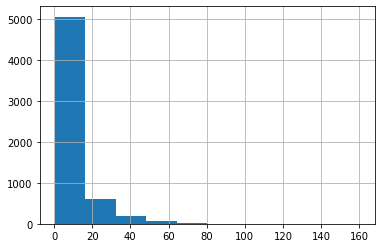

In [30]:
data['Price'].hist()

In [31]:
data['log_price'] = np.log(data['Price'])

<AxesSubplot:>

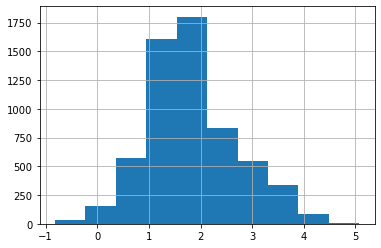

In [32]:

data['log_price'].hist()

In [33]:
data.drop('Price', inplace = True, axis=1)

<AxesSubplot:>

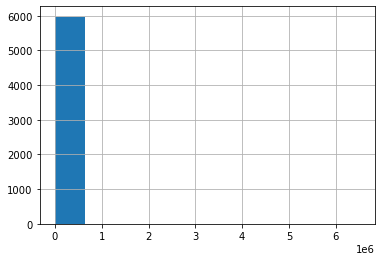

In [34]:

data['Kilometers_Driven'].hist()

In [35]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])

<AxesSubplot:>

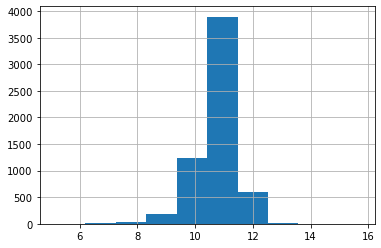

In [36]:

data['log_Kilometers_Driven'].hist()

In [37]:
data.drop('Kilometers_Driven', inplace = True, axis=1)

<AxesSubplot:>

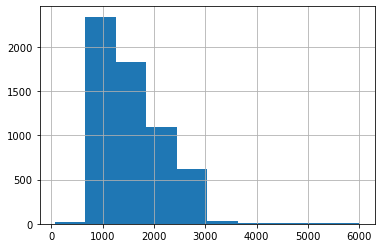

In [38]:

data['Engine'].hist()

In [39]:
data['log_Engine'] = np.log(data['Engine'])

<AxesSubplot:>

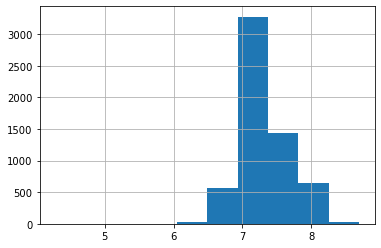

In [40]:

data['log_Engine'].hist()

In [41]:
data.drop('Engine', inplace = True, axis=1)

<AxesSubplot:>

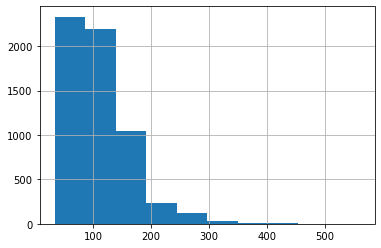

In [42]:

data['Power'].hist()

In [43]:
data['log_Power'] = np.log(data['Power'])

<AxesSubplot:>

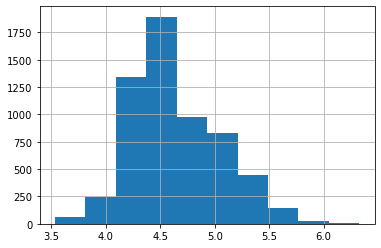

In [44]:

data['log_Power'].hist()

In [45]:
data.drop('Power', inplace = True, axis=1)

<AxesSubplot:>

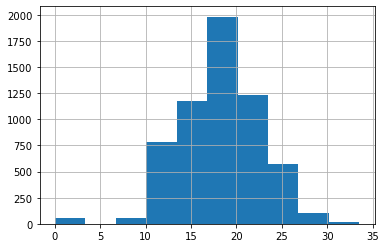

In [46]:
data['Mileage'].hist()

In [ ]:
#정규분포에 가까우므로 log 변환 안함

In [47]:

data.describe()

,Year,Mileage,Seats,log_price,log_Kilometers_Driven,log_Engine,log_Power
count,5976.000000,5976.000000,5975.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,2013.387718,18.181289,5.280167,1.828942,10.756777,7.331047,4.636604
std,3.246541,4.515751,0.804969,0.872456,0.716840,0.340182,0.414580
min,1998.000000,0.000000,2.000000,-0.820981,5.141664,4.276666,3.532226
25%,2012.000000,15.200000,5.000000,1.252763,10.431509,7.088409,4.317488
50%,2014.000000,18.160000,5.000000,1.731656,10.878047,7.308543,4.543295
75%,2016.000000,21.100000,5.000000,2.299329,11.198215,7.592870,4.927978
max,2019.000000,33.540000,10.000000,5.075174,15.687313,8.699181,6.327937


범주형 변수 더미로 변환

In [49]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner', drop_first=True)
Year_dummy = pd.get_dummies(data['Year'], prefix='Year', drop_first=True)
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat', drop_first=True)
Name2_dummy = pd.get_dummies(data['Name2'], prefix='Name2', drop_first=True)

In [50]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Name2_dummy],axis=1)

In [51]:
num_feature = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_price']

<AxesSubplot:>

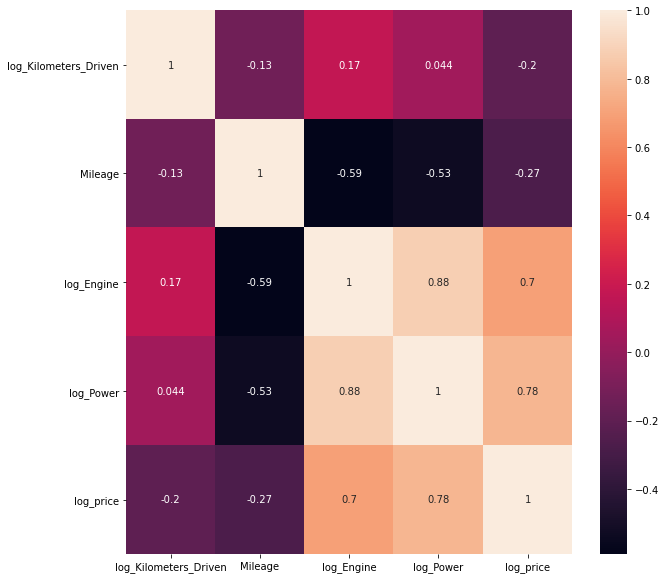

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data[num_feature].corr(), annot=True)

In [ ]:
# log_price와 log_power, log_engine의 상관관계가 높은 것을 확인할 수 있음

In [53]:
target = data["log_price"]
feature = data.drop(['log_price'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [57]:
y_train

Name2        
BMW      3590    3.457893
Tata     1414    0.916291
Hyundai  983     0.916291
BMW      1908    2.740840
Maruti   2746    0.810930
                   ...   
Honda    2294    1.492904
Maruti   1983    1.223775
Honda    3903    1.704748
Nissan   361     1.011601
Honda    3460    1.599388
Name: log_price, Length: 4780, dtype: float64

In [59]:
# linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_train)